Source:  
https://archive.ics.uci.edu/dataset/571/hcv+data

Features:  
ID Patient (Index)  

Category (Target)  : 0=Blood Donor  |  0s=suspect Blood Donor  | 1=Hepatitis  | 2=Fibrosis  | 3=Cirrhosis  

Age  

Sex  

ALB - Albumin: Albumin is a protein produced by the liver. Its levels in the blood can indicate liver function and overall health. Abnormal levels may suggest liver disease or other conditions.  

ALP - Alkaline Phosphatase: Alkaline phosphatase is an enzyme found in various tissues throughout the body, including the liver, bones, and bile ducts. Elevated levels may indicate liver or bone disorders.  

AST - Aspartate Aminotransferase: AST is an enzyme found in the liver, heart, muscles, and other tissues. Elevated levels may suggest liver damage or heart muscle injury.  

BIL - Bilirubin: Bilirubin is a yellowish pigment produced during the breakdown of red blood cells. Elevated levels may indicate liver disease or certain blood disorders.  

CHE - Cholinesterase: Cholinesterase is an enzyme primarily produced by the liver. Its levels can indicate liver function and may be affected by certain medications or liver diseases.  

CHOL - Cholesterol: Cholesterol is a fatty substance found in the blood. High levels of cholesterol can increase the risk of heart disease and other cardiovascular problems.  

CREA - Creatinine: Creatinine is a waste product generated by muscle metabolism. Its levels in the blood can indicate kidney function. Abnormal levels may suggest kidney disease or other conditions affecting kidney function.  

GGT - A gamma-glutamyl transferase test measures the amount of GGT in the blood. GGT is an enzyme found throughout the body, but it is mostly found in the liver. When the liver is damaged, GGT may leak into the bloodstream. High levels of GGT in the blood may be a sign of liver disease or damage to the bile ducts. Bile ducts are tubes that carry bile in and out of the liver. Bile is a fluid made by the liver. It is important for digestion.  

PROT - (Protein) refers to the total protein concentration measured in the blood of the patients. It is an important clinical marker used to assess the health and function of various organs, especially the liver, and to diagnose a range of medical conditions.  

## Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(filepath_or_buffer="hcvdat0.csv", index_col=[0])
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [4]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
data.shape

(615, 13)

In [6]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
# Find unique values for each column
len_unique = {}
for col in data.columns:
    len_unique[col]=len(data[col].unique())
len_unique

{'Category': 5,
 'Age': 49,
 'Sex': 2,
 'ALB': 190,
 'ALP': 415,
 'ALT': 342,
 'AST': 297,
 'BIL': 188,
 'CHE': 407,
 'CHOL': 314,
 'CREA': 117,
 'GGT': 358,
 'PROT': 199}

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'ALB'}>,
        <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'BIL'}>],
       [<Axes: title={'center': 'CHE'}>,
        <Axes: title={'center': 'CHOL'}>,
        <Axes: title={'center': 'CREA'}>],
       [<Axes: title={'center': 'GGT'}>,
        <Axes: title={'center': 'PROT'}>, <Axes: >]], dtype=object)

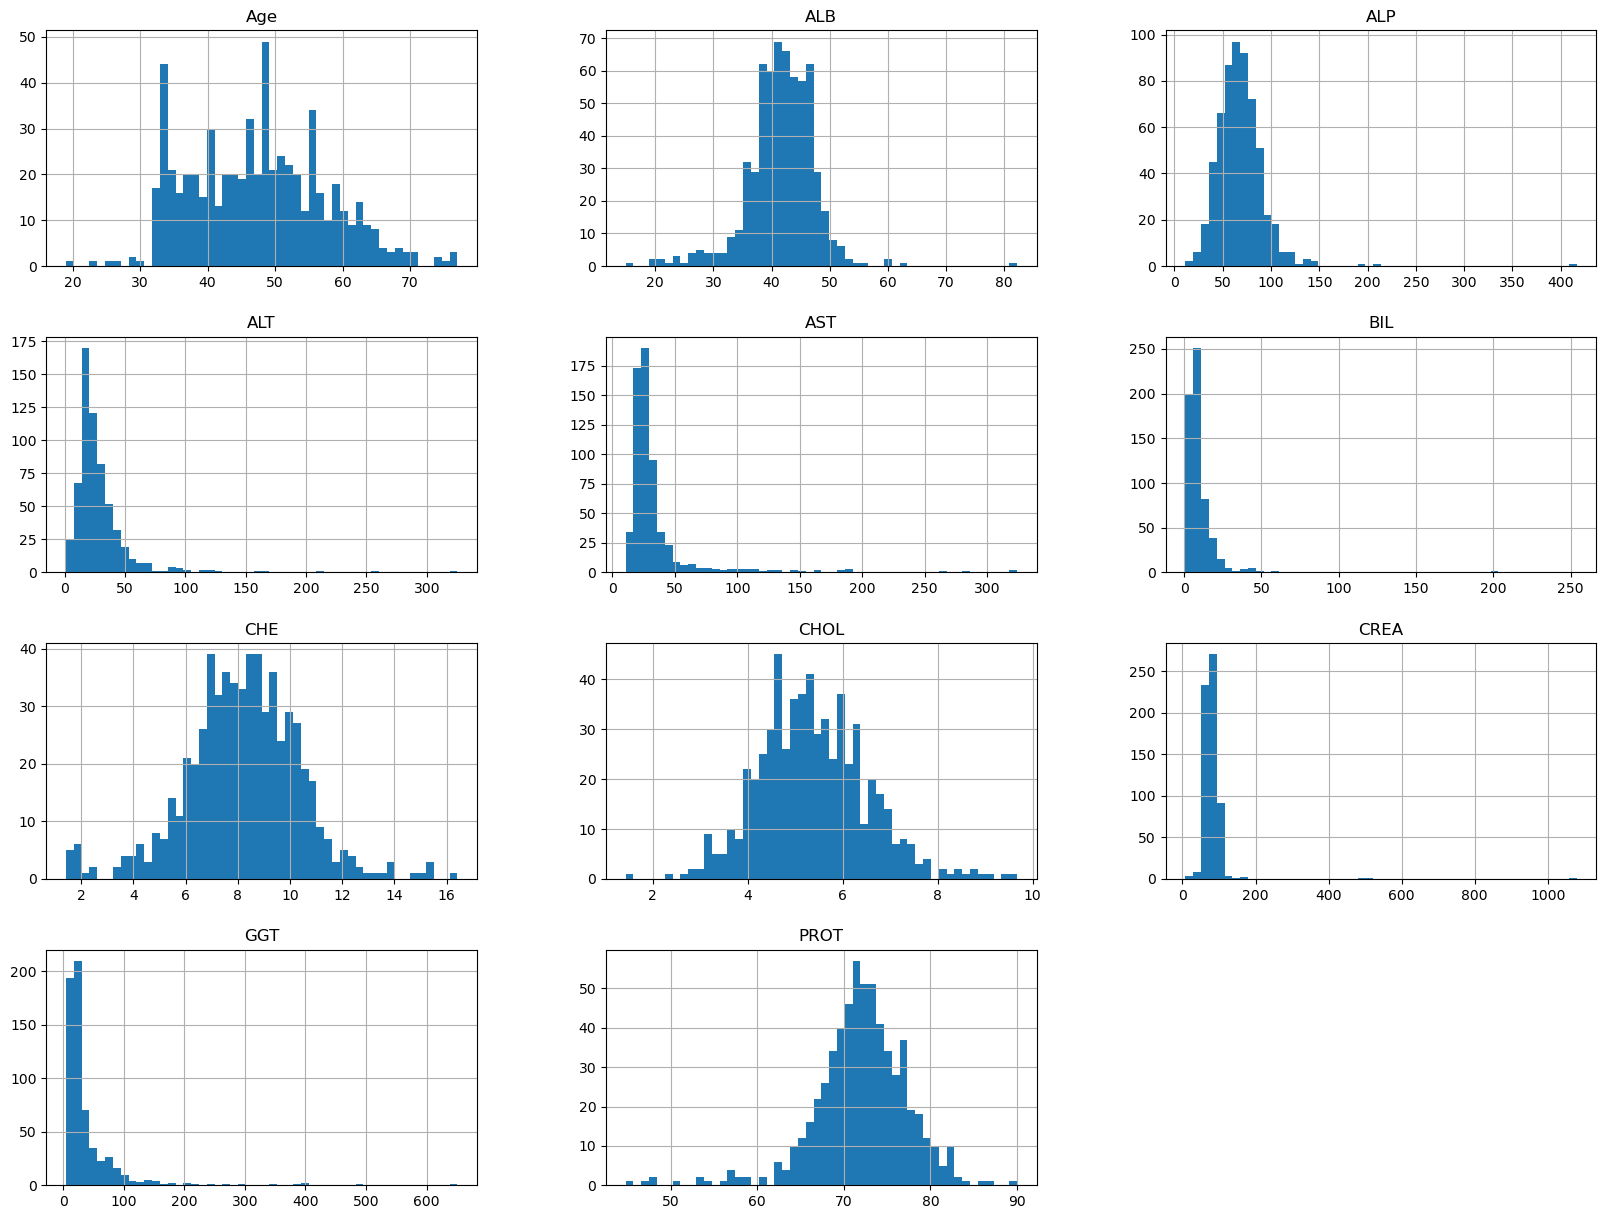

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

In [10]:
data[data.ALB.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79.0


In [11]:
data[data.ALP.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
547,1=Hepatitis,30,m,45.0,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
569,2=Fibrosis,49,m,39.0,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
570,2=Fibrosis,49,m,46.0,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
571,2=Fibrosis,50,m,42.0,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
572,2=Fibrosis,53,m,46.0,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
577,2=Fibrosis,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
582,2=Fibrosis,49,f,39.0,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
583,2=Fibrosis,51,f,37.0,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [12]:
data[data.ALT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0


In [13]:
data[data.CHOL.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
585,2=Fibrosis,75,f,36.0,NaN,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
604,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


In [14]:
data[data.PROT.isnull()==True]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN


In [15]:
# Correlation between feature before the split
# data_filled = data.fillna(data.mean())
# correlation_matrix_before_split = data_filled.corr()
# print("Correlation Matrix Before Splitting:\n", correlation_matrix_before_split)

In [16]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_before_split, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Before Splitting')
# plt.show()

We observe that there is a correlation between the following: (PROT, ALB), (ALP, GGT), (AST, GGT), (CHOL, CHE)

In [17]:
print("Percentage of male: {:.2f}%".format(len(data[data.Sex=='m'])/len(data)*100), "| Percentage of female: {:.2f}%".format(len(data[data.Sex=='f'])/len(data)*100))

Percentage of male: 61.30% | Percentage of female: 38.70%


In [18]:
# Separate the features from the target
y = data['Category']
X = data.drop(['Category'], axis=1)

In [19]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
y.head()

1    0=Blood Donor
2    0=Blood Donor
3    0=Blood Donor
4    0=Blood Donor
5    0=Blood Donor
Name: Category, dtype: object

## Data pre-processing

In [21]:
# Distinguish between Categorical and Numerical data

In [22]:
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
print(categorical_cols)

['Sex']


In [23]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
print(numerical_cols)

['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [24]:
# Preprocessing preparation

In [25]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')),    
    ('scale', StandardScaler())
])

In [26]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])
# We could have been using binary_encoding instead of One-Hot-Encoding, 
# but because there are only one categorical column with only 2 values and a dataset 
# with only 615 samples we opted for the OneHotEncoding

In [27]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed training data into a dataframe
X_train_processed_df = pd.DataFrame(X_train_processed, columns=numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))
X_train_processed_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,-0.835559,-0.901069,0.162208,0.027706,-0.257913,-0.280688,-1.157568,-6.395298e-01,-0.080611,-0.322796,-1.056130,0.0,1.0
1,-0.835559,0.726659,-0.254421,-0.320779,-0.346239,1.817927,0.219224,-5.367520e-01,-0.080611,-0.486144,0.667928,0.0,1.0
2,0.591500,0.496654,-0.315969,-0.588518,-0.480152,-0.179486,-0.566162,-3.483261e-01,-0.208413,-0.427632,0.012036,0.0,1.0
3,1.101164,-2.723417,-0.727864,0.478187,1.203739,-0.296667,-1.417786,-1.607354e+00,-0.756136,-0.113126,-3.923313,1.0,0.0
4,-1.447156,0.125108,3.282193,-0.597018,-0.622613,-0.424502,0.039437,7.607084e-16,-0.610077,-0.247217,0.461790,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.937492,-0.317210,-0.235484,1.846631,0.254948,-0.051651,1.302678,1.373202e+00,0.321053,1.278990,0.218173,0.0,1.0
488,-0.631693,0.532040,0.332647,-0.129537,-0.420318,-0.270035,1.037729,-1.007817e+00,-0.135383,-0.295978,0.030776,0.0,1.0
489,1.203097,-0.334903,-0.874631,-0.121038,-0.386128,0.710029,-0.305944,-1.470317e+00,0.083706,-0.417880,-0.006704,0.0,1.0
490,0.081836,0.478961,-0.727864,-0.503522,-0.329143,-0.365911,0.432130,1.176211e+00,-0.135383,-0.622674,0.218173,1.0,0.0


Correlation Matrix After Preprocessing (Training Data):
             Age       ALB       ALP       ALT       AST       BIL       CHE  \
Age    1.000000 -0.199775  0.127874 -0.016273  0.073680  0.038073 -0.055278   
ALB   -0.199775  1.000000 -0.103931 -0.002524 -0.198515 -0.190702  0.330547   
ALP    0.127874 -0.103931  1.000000  0.231388  0.007676  0.019561  0.091467   
ALT   -0.016273 -0.002524  0.231388  1.000000  0.232347 -0.086728  0.142950   
AST    0.073680 -0.198515  0.007676  0.232347  1.000000  0.302727 -0.237370   
BIL    0.038073 -0.190702  0.019561 -0.086728  0.302727  1.000000 -0.350162   
CHE   -0.055278  0.330547  0.091467  0.142950 -0.237370 -0.350162  1.000000   
CHOL   0.144243  0.206447  0.117692  0.046198 -0.235556 -0.191654  0.447747   
CREA  -0.023037 -0.009998  0.201258 -0.065135 -0.020808  0.022775 -0.019170   
GGT    0.088927 -0.113824  0.281374  0.369106  0.558470  0.240706 -0.083688   
PROT  -0.167890  0.557083 -0.052467  0.047730  0.029232 -0.062676  0.30165

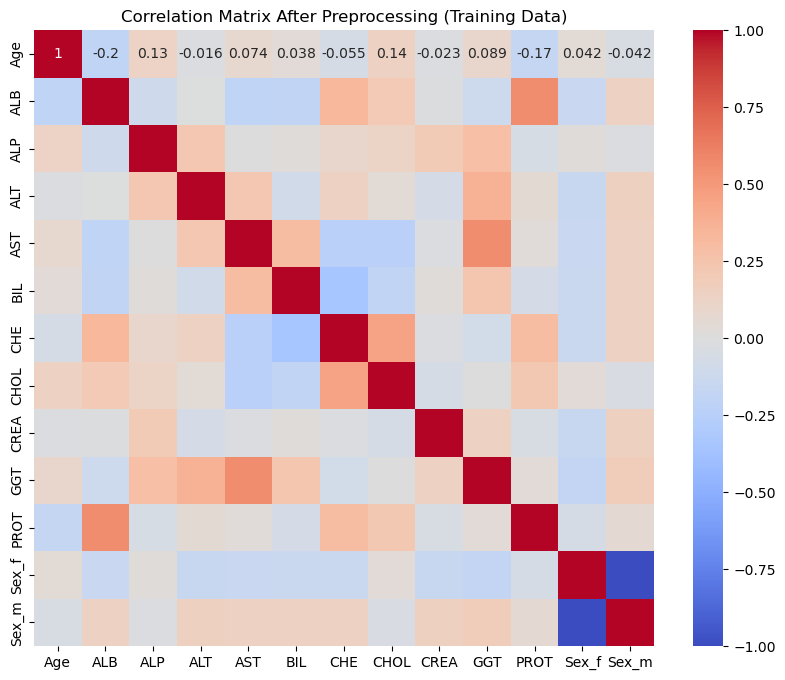

In [29]:
# Calculate the correlation matrix on the processed training data
correlation_matrix_after_preprocessing = X_train_processed_df.corr()
print("Correlation Matrix After Preprocessing (Training Data):\n", correlation_matrix_after_preprocessing)

# Visualize the correlation matrix for training data after split
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after_preprocessing, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Preprocessing (Training Data)')
plt.show()

## Applying Models

### A. Logistic Regression

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

Grid Search Result:- Accuracy Before = 0.8943089430894309    |    Accuracy After  = 0.8943089430894309

In [31]:
Logmodel = LogisticRegression(C=1,max_iter=50,random_state=1)

# C: A regularization parameter determining the inverse of regularization strength in logistic regression.
# max_iter: Maximum number of iterations taken for the solvers to converge.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

Accuracy: 0.8943089430894309

Confusion Matrix:



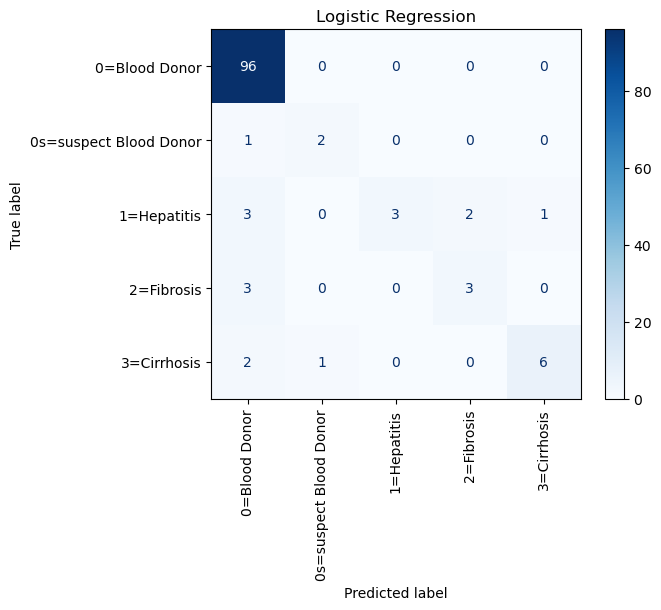

In [32]:
Logmodel.fit(X_train_processed, y_train)
y_pred_Log = Logmodel.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_Log)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Log)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=Logmodel.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

### B. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

Grid Search Results:- Accuracy Before =  0.8617886178861789 | Accuracy After  =  0.8780487804878049

In [34]:
DT_clf = DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=1)

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

Accuracy: 0.8780487804878049

Confusion Matrix:



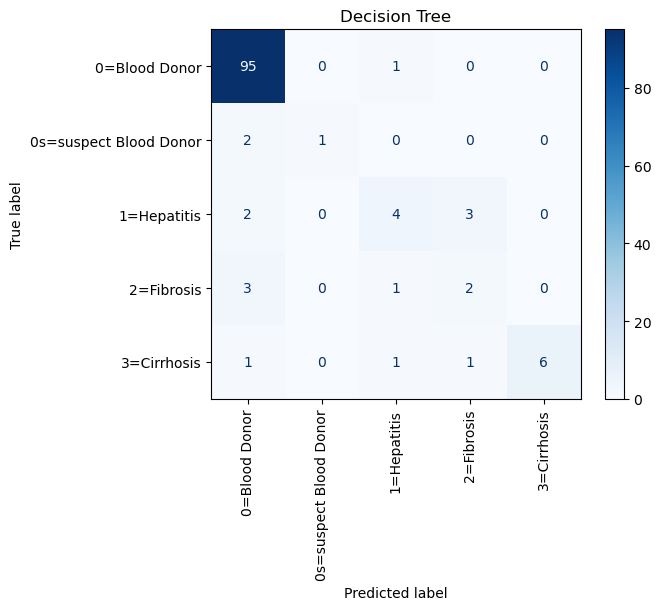

In [35]:
DT_clf.fit(X_train_processed,y_train)
y_pred_DTC = DT_clf.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_DTC)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DTC)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=DT_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Decision Tree")
plt.show()

### C. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

Grid Search Results:- Accuracy Before =  0.8536585365853658 | Accuracy After  =  0.8617886178861789

In [37]:
RF_clf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators=400,random_state=1)  

# criterion: A function to measure the quality of a split in decision trees.
# max_depth: The maximum depth of the tree.
# random_state: Controls the randomness of the algorithm to produce reproducible results.
# n_estimators: The number of trees in the forest.


Accuracy: 0.8617886178861789

Confusion Matrix:



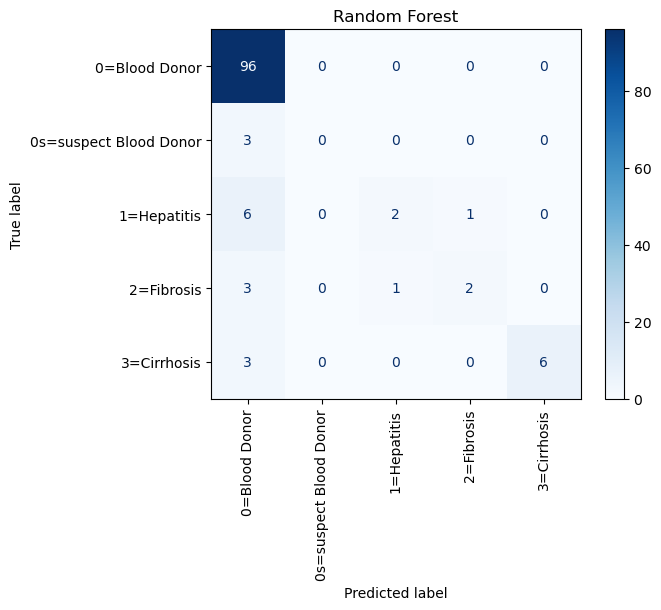

In [38]:
RF_clf.fit(X_train_processed, y_train)
y_pred_RF = RF_clf.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest")
plt.show()

### D. Stochastic Gradient Descent (SGD)

In [39]:
from sklearn.linear_model import SGDClassifier

Grid Search Results:- Accuracy Before =  0.8699186991869918 | Accuracy After  =  0.8699186991869918

In [40]:
SGD_model = SGDClassifier(alpha=0.001, loss='perceptron',random_state=1)

# alpha: The constant that multiplies the regularization term. Higher values specify stronger regularization.
# loss: The loss function to be used. It defines the objective function to optimize during the training.
# random_state: Controls the randomness of the algorithm to produce reproducible results.

Accuracy: 0.8699186991869918

Confusion Matrix:



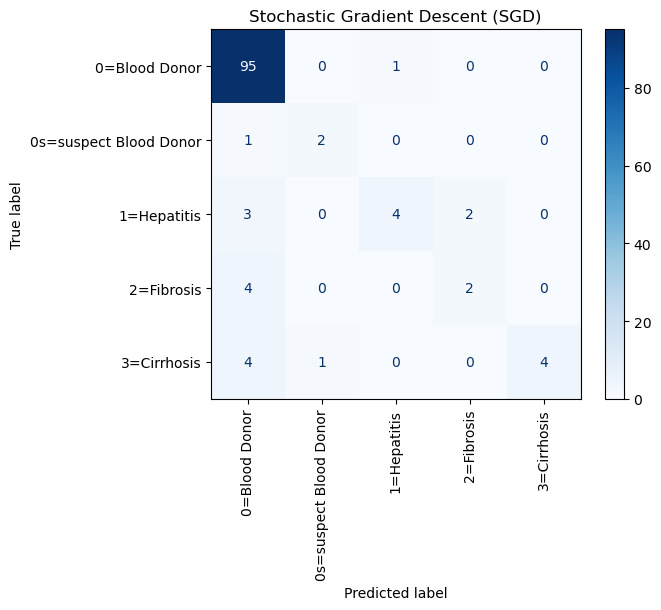

In [41]:
SGD_model.fit(X_train_processed, y_train)
y_pred_SGD = SGD_model.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_SGD)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SGD)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SGD_model.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Stochastic Gradient Descent (SGD)")
plt.show()

### E. Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC

Grid Search Results:- Accuracy Before =  0.8130081300813008 | Accuracy After  =  0.8699186991869918

In [43]:
SVC_model = SVC(C=10,gamma=0.01,random_state=1) 

# C: regularization parameter
# Gamma: kernel coeff.,the ‘spread’ of the kernel/decision region.  
# When gamma is low, the ‘curve’ of the decision boundary.
# is very low and thus the decision region is very broad.


Accuracy: 0.8699186991869918

Confusion Matrix:



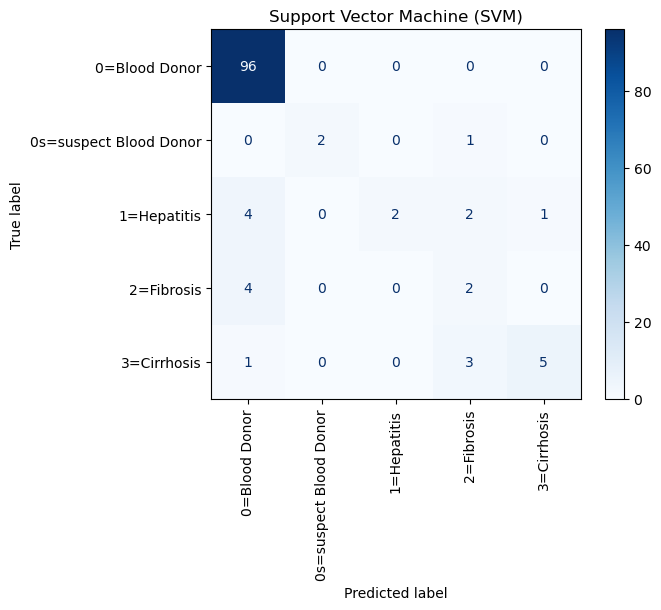

In [44]:
SVC_model.fit(X_train_processed,y_train)
y_pred_SVC = SVC_model.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_SVC)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=SVC_model.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

## GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV 

### A. Logistic Regression GridSearchCV

In [46]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200, 500],'penalty': ['l1', 'l2']} 
grid_log = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)
grid_log.fit(X_train_processed,y_train)

c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2']})

{'C': 1, 'max_iter': 50, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=50)
Accuracy: 0.8943089430894309

Confusion Matrix:



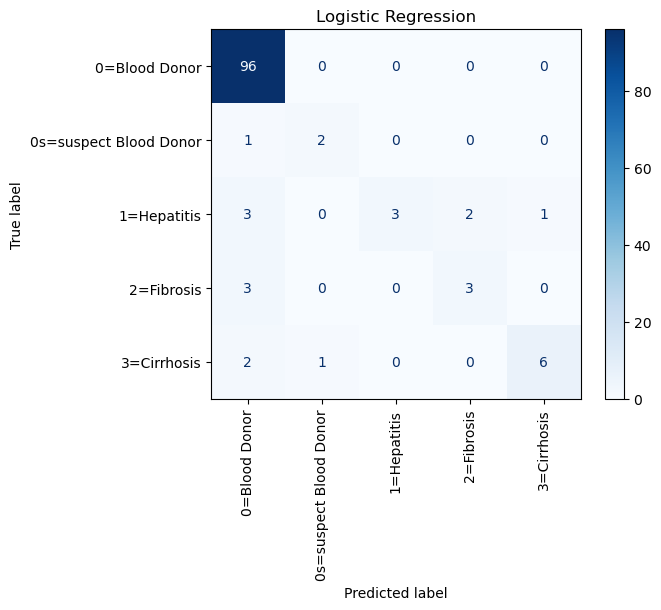

In [47]:
print(grid_log.best_params_)
print(grid_log.best_estimator_)
grid_log_predictions = grid_log.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_log_predictions)
print("Accuracy:", accuracy)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_log_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_log.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Logistic Regression")
plt.show()

### B. Decision Tree GridSearchCV

In [48]:
param_grid = {'criterion':['gini','entropy','log_loss'],'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]} 


grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, refit=True, verbose=0)
grid_dt.fit(X_train_processed, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)


c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=5)


In [49]:
grid_dt_predictions = grid_dt.predict(X_test_processed)

Accuracy: 0.8780487804878049

Confusion Matrix:



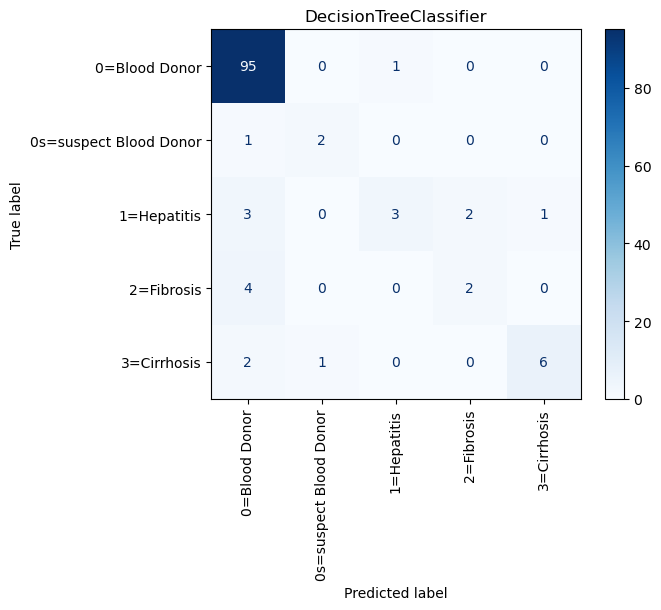

In [50]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_dt_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_dt_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_dt.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("DecisionTreeClassifier")
plt.show()

### C. Random Forest GridSearchCV

In [51]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],'criterion':['gini','entropy','log_loss'],
                'max_depth': [None, 10, 20, 30, 40, 50]} 
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_rf.fit(X_train_processed,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}
RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400)


Accuracy: 0.8536585365853658

Confusion Matrix:



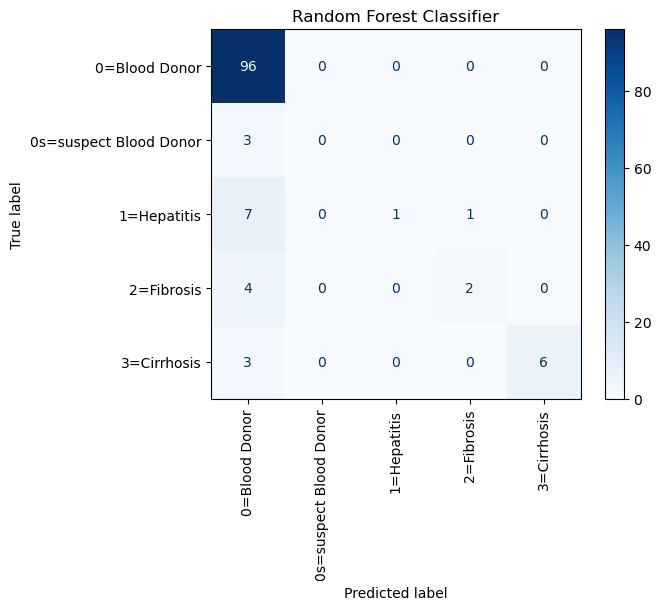

In [52]:
grid_rf_predictions = grid_rf.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_rf_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_rf_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_rf.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Random Forest Classifier")
plt.show()

### D. Stochastic Gradient Descent (SGD) GridSearchCV

In [53]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1],
              'eta0': [0.01, 0.1, 0.5, 1.0]} 

grid_sgd = GridSearchCV(SGDClassifier(),param_grid=param_grid,refit=True,verbose=0)
grid_sgd.fit(X_train_processed,y_train)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)

c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\majed\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: Converge

{'alpha': 0.0001, 'eta0': 1.0, 'loss': 'modified_huber', 'penalty': 'l2'}
SGDClassifier(eta0=1.0, loss='modified_huber')


c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\majed\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\majed\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\majed\anaconda3\Lib\site-packa

Accuracy: 0.8780487804878049

Confusion Matrix:



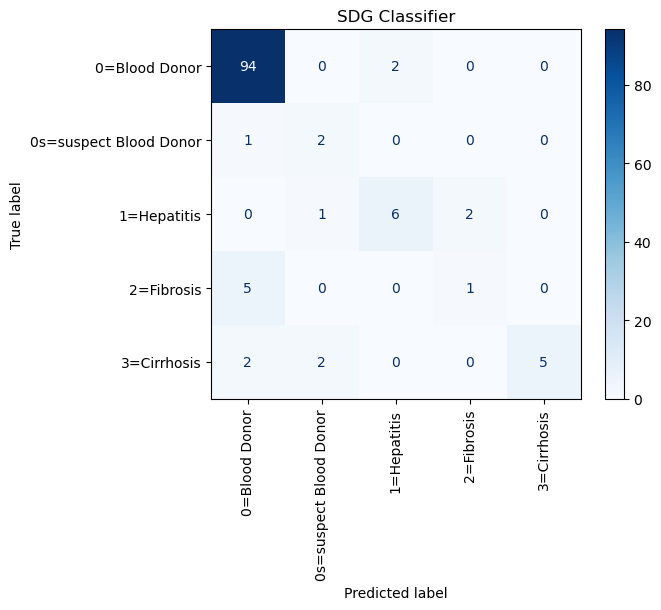

In [54]:
grid_sdg_predictions = grid_sgd.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_sdg_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_sdg_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_sgd.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("SDG Classifier")
plt.show()

### E. Support Vector Machine (SVM) GridSearchCV

In [55]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid_svm.fit(X_train_processed,y_train)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

c:\Users\majed\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


Accuracy: 0.8699186991869918

Confusion Matrix:



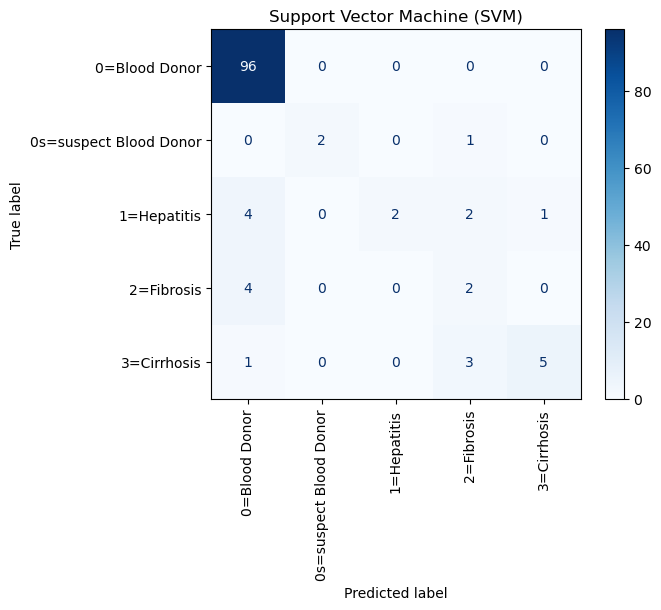

In [56]:
grid_svm_predictions = grid_svm.predict(X_test_processed)
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_svm_predictions)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svm_predictions)
#print("Confusion Matrix:\n", conf_matrix)
print("\nConfusion Matrix:\n")
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_svm.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)
plt.title("Support Vector Machine (SVM)")
plt.show()

6. Randomly (or based on certain hypothesis) remove some features and re-evaluate the models. Document your observations with respect to models performances.

In [76]:
from auto_feature_selector import autoFeatureSelector

In [101]:
# remove text from the target column and change the type to int
y_train_numbers = y_train.str.split("=", n=1, expand=True)[0]
y_train_numbers = [4 if n == "0s" else n for n in y_train_numbers]
numeric_y_train = pd.Series(pd.to_numeric(y_train_numbers))
autoFeatureSelector(X=X_train_processed_df, y=numeric_y_train, num_feats=13, max_number_of_features=13, methods=["pearson", "chi-square", "rfe", "log-reg", "rf", "lgbm"])

0     -0.835559
1     -0.835559
2      0.591500
3      1.101164
4     -1.447156
         ...   
487   -0.937492
488   -0.631693
489    1.203097
490    0.081836
491   -0.631693
Name: Age, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length: 492, dtype: int64
0     -0.901069
1      0.726659
2      0.496654
3     -2.723417
4      0.125108
         ...   
487   -0.317210
488    0.532040
489   -0.334903
490    0.478961
491    0.107415
Name: ALB, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length: 492, dtype: int64
0      0.162208
1     -0.254421
2     -0.315969
3     -0.727864
4      3.282193
         ...   
487   -0.235484
488    0.332647
489   -0.874631
490   -0.727864
491   -0.566893
Name: ALP, Length: 492, dtype: float64 0      0
1      0
2      0
3      0
4      0
      ..
487    0
488    0
489    0
490    0
491    0
Length

features
ALP         6
AST         6
ALB         5
ALT         5
CHE         5
CREA        5
PROT        5
Age         4
BIL         4
CHOL        4
GGT         4
Sex_f       4
Sex_m       4
Name: count, dtype: int64

based on the given results, the features (ALP and AST) are the most important with 6 votes each while the features (ALB, ALT, CHE, CREA, and PROT) are the second most important ones with 5 votes each, the following features received 4 votes each (Age, BIL, CHOL, GGT, Sex_f, and Sex_m)

These results lead us to believe that (ALP, AST, CHE, ALB, ALT, AGE, BIL, CHOL, and CREA) are the most important while (ALP, AST, and CHE) can't be removed as they have the most significant effect, and the rest should be used as they have the second most significant effect.

In [88]:
new_x_train_df = X_train_processed_df[["ALP", "AST", "CHE", "ALB", "ALT", "Age", "BIL", "CHOL", "CREA"]]